In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math as math

In [2]:
path='stack-overflow-developer-survey-2021'
public=pd.read_csv(path+'/survey_results_public.csv')

In [3]:
public.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [4]:
public.to_numpy()[...][:]

array([[1, 'I am a developer by profession',
        'Independent contractor, freelancer, or self-employed', ...,
        'Appropriate in length', 'Easy', 62268.0],
       [2, 'I am a student who is learning to code',
        'Student, full-time', ..., 'Appropriate in length', 'Easy', nan],
       [3,
        'I am not primarily a developer, but I write code sometimes as part of my work',
        'Student, full-time', ..., 'Appropriate in length', 'Easy', nan],
       ...,
       [83437, 'I am a developer by profession', 'Employed full-time',
        ..., 'Appropriate in length', 'Neither easy nor difficult',
        90000.0],
       [83438, 'I am a developer by profession', 'Employed full-time',
        ..., 'Appropriate in length', 'Neither easy nor difficult',
        816816.0],
       [83439, 'I am a developer by profession', 'Employed full-time',
        ..., 'Appropriate in length', 'Easy', 21168.0]], dtype=object)

In [5]:
public.loc[:, ["ResponseId", "ToolsTechHaveWorkedWith"]]

,ResponseId,ToolsTechHaveWorkedWith
0,1,NaN
1,2,Docker;Git;Yarn
2,3,NaN
3,4,NaN
4,5,Docker;Git;Kubernetes;Yarn
...,...,...
83434,83435,Docker;Git
83435,83436,Git;Unity 3D;Unreal Engine
83436,83437,Ansible;Docker;Git;Terraform
83437,83438,Ansible;Docker;Git;Terraform


In [6]:
lista = list(range(1,len(public)+1))
G = nx.Graph()
G.add_nodes_from(lista)
#G.nodes

In [7]:
#(red bipartita A)recorrer public, crear nodo y enlazar con lenguaje trabajado, sino existe crearlo y enlazarlo
#(red pesada B)recorrer public, crear lenguajes con los que trabaje el usuario X si no existen ya y enlazarlos entre ellos

In [8]:
A = nx.Graph()
#for a in range (len(public)):
for a in range (1000):
    nodoId = public.to_numpy()[a][0]
    nodoLenguaje = public.to_numpy()[a][26]
    
    #A.add_node(nodoId)
    
    if str(nodoLenguaje) != "nan":
        listaLenguajes = nodoLenguaje.split(';')
        for lista in listaLenguajes:
            A.add_node(nodoId)
            A.add_node(lista)
            A.add_edge(nodoId, lista)

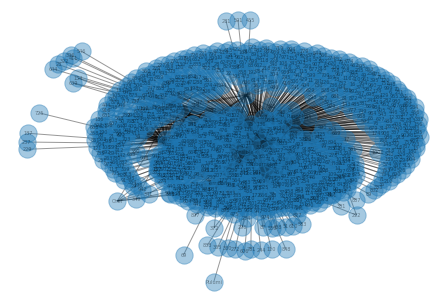

In [9]:
nx.draw(A,with_labels=True,alpha=0.4,font_size=5)

In [10]:
B = nx.Graph()
#for a in range (len(public)):
for a in range (1000):
    nodoLenguaje = public.to_numpy()[a][26]
    
    if str(nodoLenguaje) != "nan":
        listaLenguajes = nodoLenguaje.split(';')
        for i in range(len(listaLenguajes)):
            j=i+1
            B.add_node(listaLenguajes[i])
            while j < len(listaLenguajes):
                if (listaLenguajes[i], listaLenguajes[j]) in B.edges():
                    valor = B[listaLenguajes[i]][listaLenguajes[j]]
                    peso = valor['weight']
                    pesoN = peso+1
                    B[listaLenguajes[i]][listaLenguajes[j]]['weight'] = pesoN
                else:    
                    B.add_edge(listaLenguajes[i], listaLenguajes[j])
                    B[listaLenguajes[i]][listaLenguajes[j]]['weight'] = 1
                j+=1

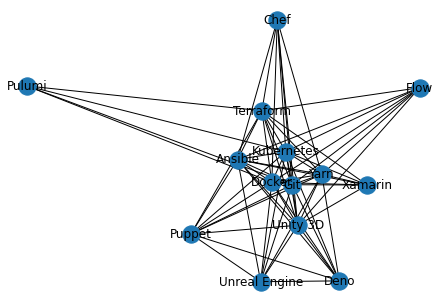

In [11]:
nx.draw(B, with_labels=True)

{('Docker', 'Git'): Text(0.9504844082212074, 0.21694189536923605, '376'),
 ('Docker', 'Yarn'): Text(0.8117448831307472, 0.39091576714549436, '95'),
 ('Docker', 'Kubernetes'): Text(0.61126047490954, 0.48746396597701686, '126'),
 ('Docker', 'Terraform'): Text(0.1882550913244052, 0.39091576714549436, '33'),
 ('Docker', 'Unity 3D'): Text(0.3887395144467736, 0.48746396597701686, '34'),
 ('Docker',
  'Unreal Engine'): Text(-8.514949134674765e-09, -2.4694480155062272e-08, '10'),
 ('Docker', 'Deno'): Text(0.18825518073137165, -0.39091578871632315, '11'),
 ('Docker', 'Puppet'): Text(0.38873948464445146, -0.48746392794320137, '10'),
 ('Docker', 'Ansible'): Text(0.04951556623394515, -0.2169418573354205, '51'),
 ('Docker', 'Xamarin'): Text(0.6112605047118621, -0.48746392794320137, '18'),
 ('Docker', 'Chef'): Text(0.811744823526103, -0.39091578871632315, '4'),
 ('Docker', 'Flow'): Text(0.04951556623394515, 0.2169419251715582, '3'),
 ('Docker', 'Pulumi'): Text(0.9504844082212074, -0.2169418573354205

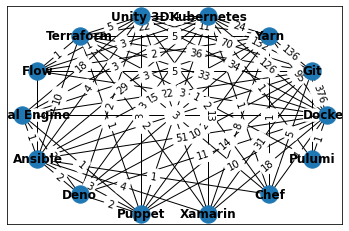

In [12]:
pos = nx.circular_layout(B)
nx.draw_networkx(B, pos, with_labels=True, font_weight='bold')
labels = nx.get_edge_attributes(B, 'weight')
nx.draw_networkx_edge_labels(B, pos, edge_labels=labels)

In [ ]:
#https://programminghistorian.org/es/lecciones/crear-y-ver-archivos-html-con-python
#https://docs.python.org/es/3/library/webbrowser.html
#https://www.geeksforgeeks.org/creating-and-viewing-html-files-with-python/
#https://www.geeksforgeeks.org/how-to-write-to-an-html-file-in-python/
#https://pandas.pydata.org/docs/user_guide/index.html
#https://networkx.org/documentation/stable/tutorial.html
#https://www.ellaberintodefalken.com/2020/02/grafos-con-networkx.html //guardar grafos para no cargarlos desde 0
#https://www.codegrepper.com/code-examples/python/frameworks/file-path-in-python/networkx+draw+graph+with+weight //peso de los arcos

import webbrowser

f = open('holamundo.html','w')

mensaje = """<html>
<head>HEAD</head>
<body><p>Hola Mundo!</p></body>
</html>"""

mensaje2 = """<html>
<head>HEAD</head>
<body><p>Hola Mundo2!</p></body>
</html>"""

f.write(mensaje)
f.write(mensaje2)
f.close()

webbrowser.open_new_tab('holamundo.html')